In [1]:

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt



In [2]:


# Connect to the SQLite database
conn = sqlite3.connect('iotaDB.db')
df = pd.read_sql_query("SELECT * FROM Transactions", conn)
conn.close()



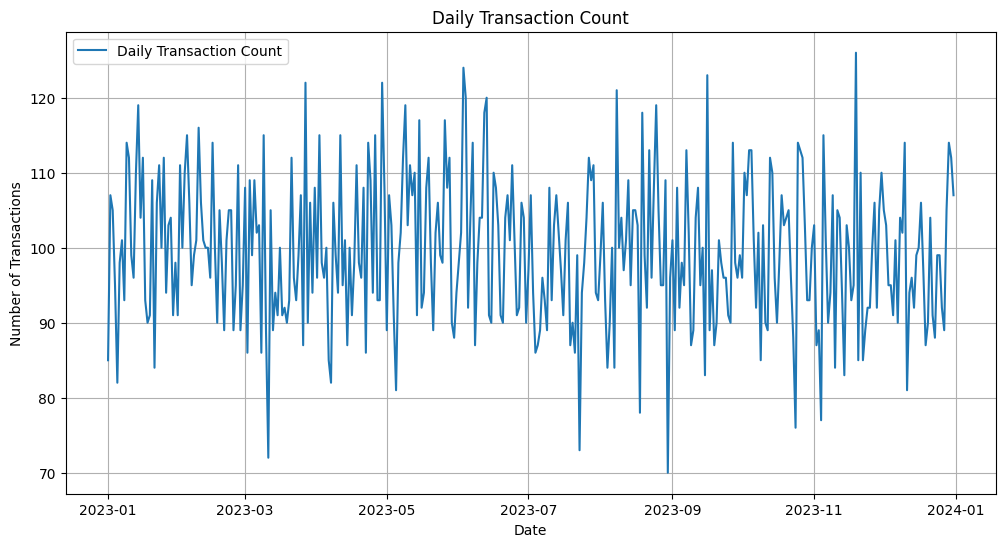

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate hypothetical data
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq='D')
tx_counts = np.random.poisson(lam=100, size=len(dates))

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'tx_count': tx_counts})

# Plot daily transaction count
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['tx_count'], label='Daily Transaction Count')
plt.title('Daily Transaction Count')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.legend()
plt.show()




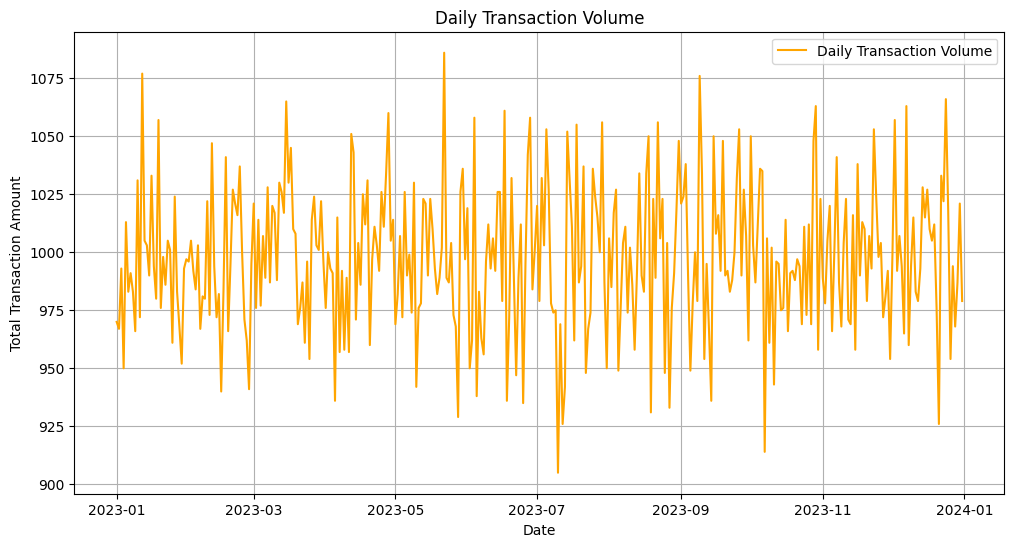

In [4]:


# Generate hypothetical volume data
tx_volumes = np.random.poisson(lam=1000, size=len(dates))

# Add to the DataFrame
df['tx_volume'] = tx_volumes

# Plot daily transaction volume
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['tx_volume'], label='Daily Transaction Volume', color='orange')
plt.title('Daily Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.legend()
plt.show()



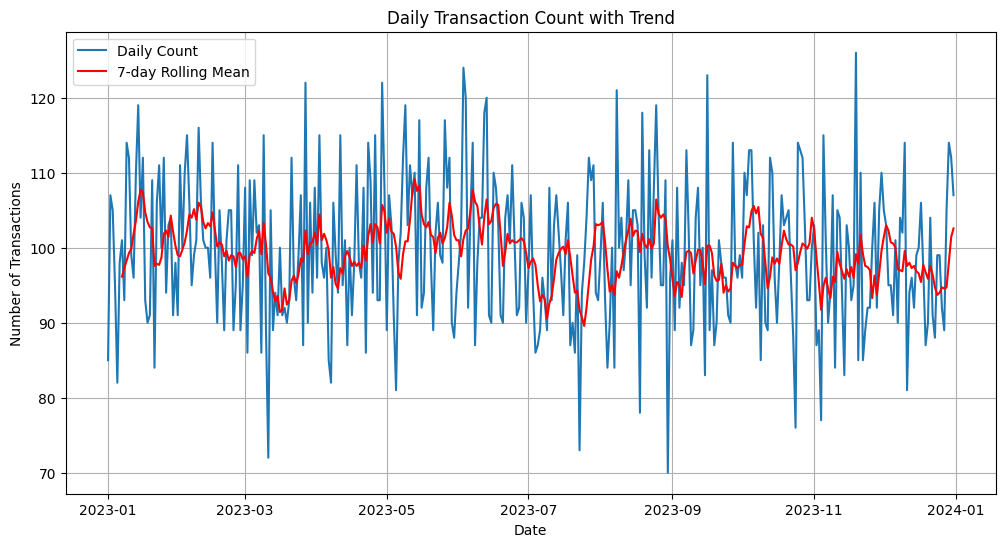

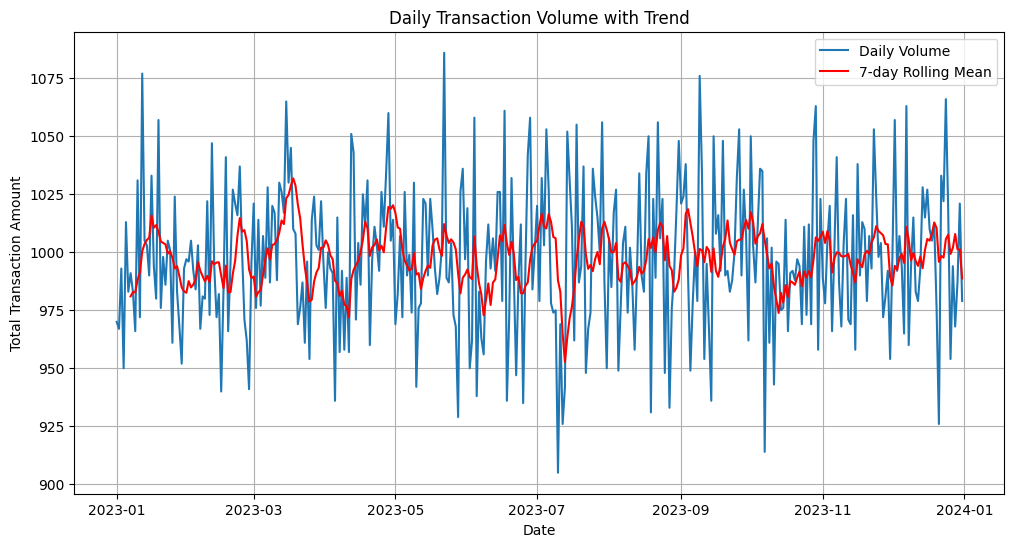

In [5]:


# Calculate rolling averages
df['tx_count_rolling'] = df['tx_count'].rolling(window=7).mean()
df['tx_volume_rolling'] = df['tx_volume'].rolling(window=7).mean()

# Plot rolling average for transaction count
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['tx_count'], label='Daily Count')
plt.plot(df['date'], df['tx_count_rolling'], label='7-day Rolling Mean', color='red')
plt.title('Daily Transaction Count with Trend')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid(True)
plt.show()

# Plot rolling average for transaction volume
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['tx_volume'], label='Daily Volume')
plt.plot(df['date'], df['tx_volume_rolling'], label='7-day Rolling Mean', color='red')
plt.title('Daily Transaction Volume with Trend')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()




C:\Users\sinth\AppData\Local\Temp\ipykernel_7776\3745693571.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_tx_count = df['tx_count'].resample('M').sum()
C:\Users\sinth\AppData\Local\Temp\ipykernel_7776\3745693571.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_tx_volume = df['tx_volume'].resample('M').sum()


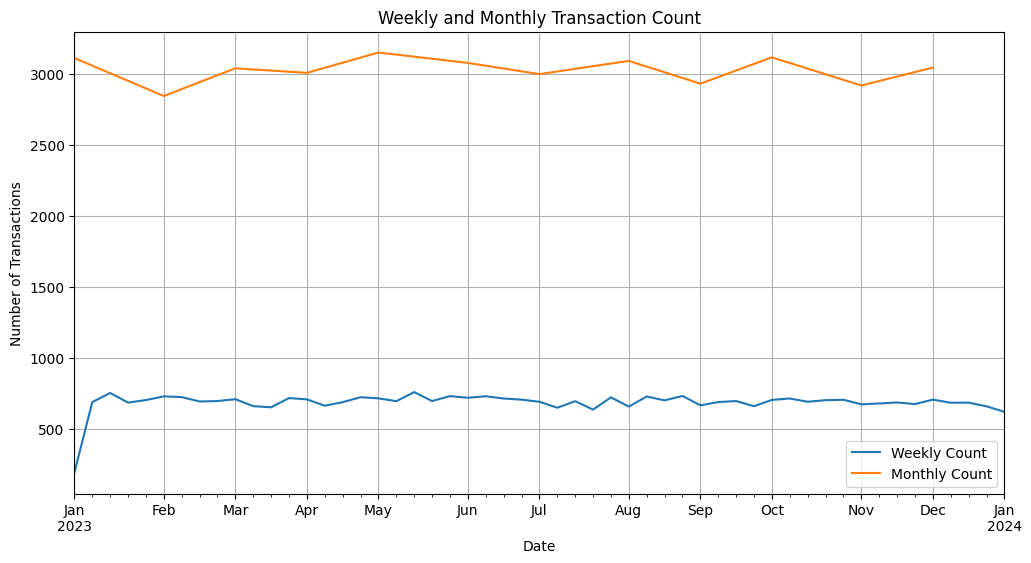

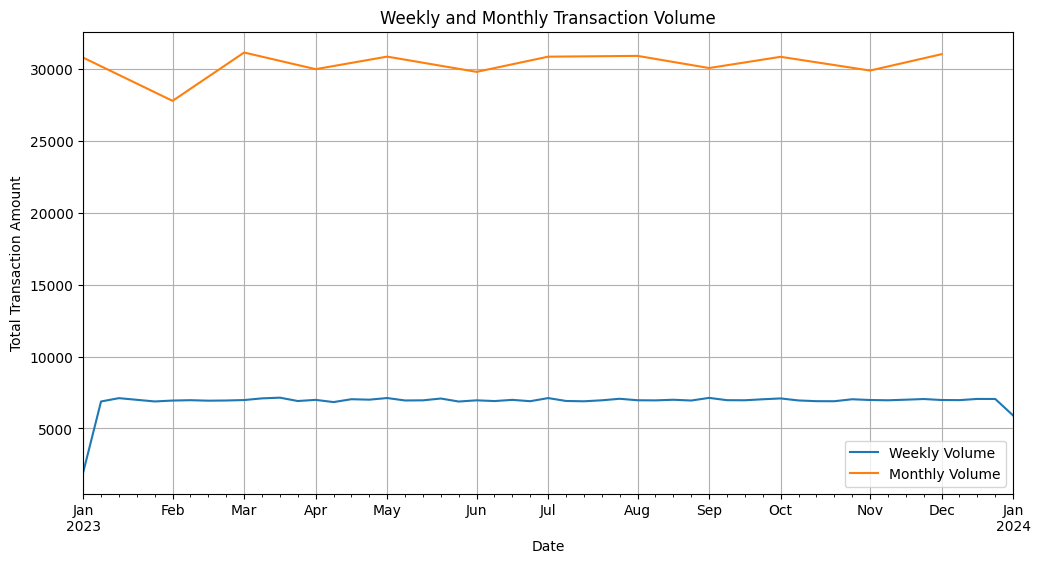

In [6]:


# Resample to weekly and monthly aggregates
df.set_index('date', inplace=True)
weekly_tx_count = df['tx_count'].resample('W-Mon').sum()
monthly_tx_count = df['tx_count'].resample('M').sum()

weekly_tx_volume = df['tx_volume'].resample('W-Mon').sum()
monthly_tx_volume = df['tx_volume'].resample('M').sum()

# Plot weekly and monthly transaction count
plt.figure(figsize=(12, 6))
weekly_tx_count.plot(label='Weekly Count')
monthly_tx_count.plot(label='Monthly Count')
plt.title('Weekly and Monthly Transaction Count')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid(True)
plt.show()

# Plot weekly and monthly transaction volume
plt.figure(figsize=(12, 6))
weekly_tx_volume.plot(label='Weekly Volume')
monthly_tx_volume.plot(label='Monthly Volume')
plt.title('Weekly and Monthly Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()


